# US Accidents Exploratory Data Analysis

This project conducts Exploratory Data Analysis (EDA) on a U.S. traffic accident dataset covering 49 states. Collected since 2016 from sources like transportation departments, law enforcement, cameras, and sensors, it contains 1.5 million records. The analysis uncovers patterns and insights into traffic incidents

### Imports

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# set Theme to plots
plt.style.use('ggplot')
sns.set_style("darkgrid")

## Load The Data

In [11]:
# Data file Locations
DATAFILE = "/Users/jashan/Downloads/US_Accidents_March23.csv"

In [9]:
df = pd.read_csv(DATAFILE)

## Data Preparation & Cleaning

In [22]:
print(f"Number Of Obserations: {df.shape[0]:,}")
print(f"Number Of Colums: {df.shape[1]}")

Number Of Obserations: 7,728,394
Number Of Colums: 46


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [27]:
description = df.describe()
description

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [29]:
number_of_numerical_cols = description.shape[1]
print(f"Number of Numeric Columns: {number_of_numerical_cols}")

Number of Numeric Columns: 13


In [30]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numberic_df = df.select_dtypes(include=numerics)

In [32]:
numberic_df.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [31]:
print(f"Number of Numeric Columns: {numberic_df.shape[1]}")

Number of Numeric Columns: 13


In [37]:
# Check for missing values
missing_values = round((df.isnull().sum()/len(df))*100,2)
missing_values.sort_values(ascending=False,inplace=True)
missing_values

End_Lat                  44.03
End_Lng                  44.03
Precipitation(in)        28.51
Wind_Chill(F)            25.87
Wind_Speed(mph)           7.39
Visibility(mi)            2.29
Wind_Direction            2.27
Humidity(%)               2.25
Weather_Condition         2.24
Temperature(F)            2.12
Pressure(in)              1.82
Weather_Timestamp         1.56
Nautical_Twilight         0.30
Civil_Twilight            0.30
Sunrise_Sunset            0.30
Astronomical_Twilight     0.30
Airport_Code              0.29
Street                    0.14
Timezone                  0.10
Zipcode                   0.02
Traffic_Calming           0.00
Railway                   0.00
Roundabout                0.00
Station                   0.00
Stop                      0.00
Country                   0.00
Traffic_Signal            0.00
Junction                  0.00
Turning_Loop              0.00
End_Time                  0.00
Start_Time                0.00
Severity                  0.00
No_Exit 

In [39]:
type(missing_values)

pandas.core.series.Series

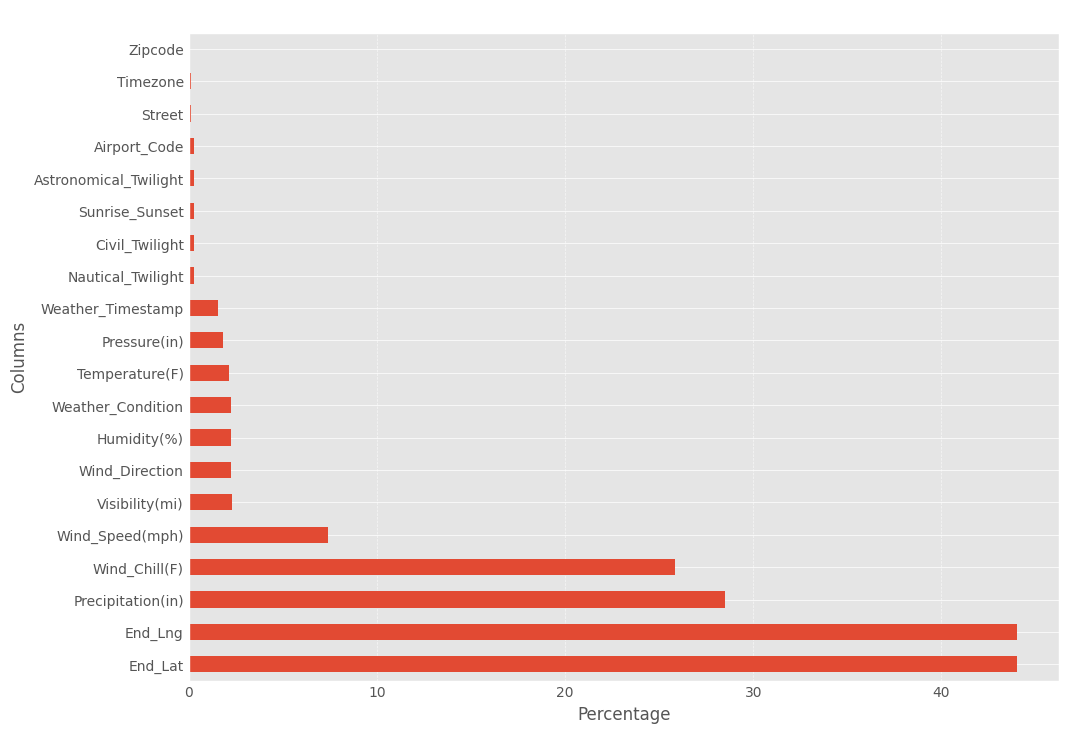

In [ ]:
# Missing Data
missing_values[missing_values>0].plot(kind="barh",figsize=(10,8))
plt.title("Missing Values in Percentage", fontsize=14, fontweight="bold")
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [64]:
# List of Citites
cities = df.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [70]:
print(f"Number Of Unqiue Cities: {len(cities):,}")

Number Of Unqiue Cities: 13,679


In [71]:
# Number of Accidents per City
number_of_accidents_by_city = df.City.value_counts()
number_of_accidents_by_city[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [ ]:
# Check if dataset contains data for New York
df["City"].__contains__("New York")

False

In [77]:
# Check if dataset contains data for New York
"New York" in df.City

False

In [78]:
"NY" in df.State

False

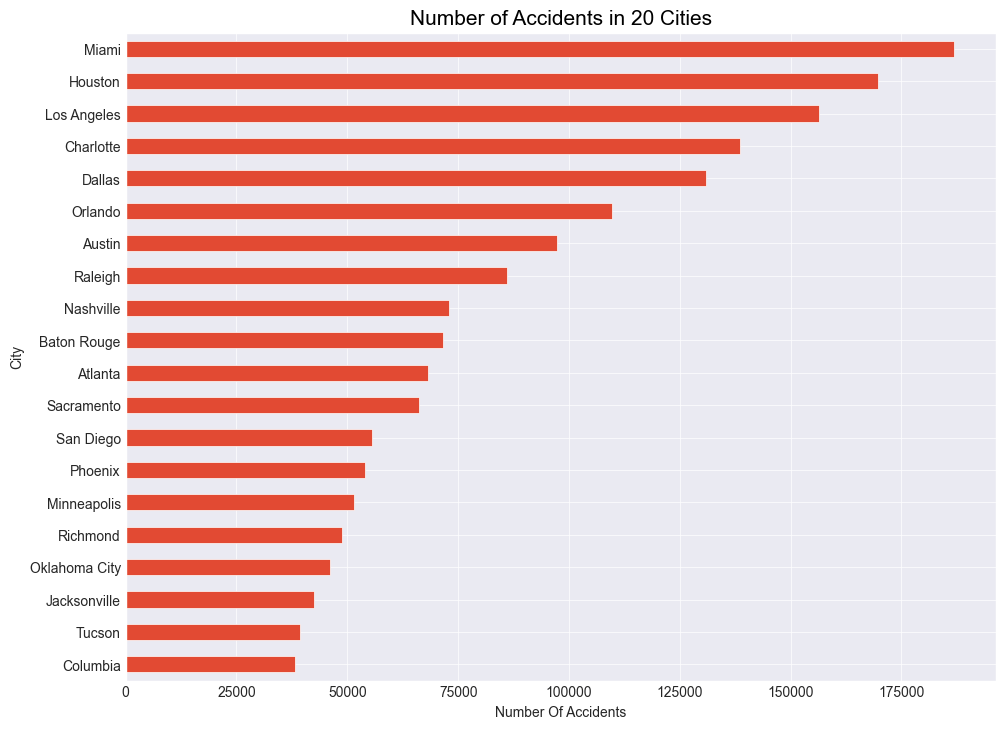

In [95]:
number_of_accidents_by_city[:20].sort_values().plot(kind="barh",figsize=(10,8))
plt.xlabel("Number Of Accidents",fontsize=10)
plt.ylabel("City",fontsize=10)
plt.title("Number of Accidents in 20 Cities",color="black",fontsize=15)
plt.show()

<Axes: xlabel='count', ylabel='Density'>

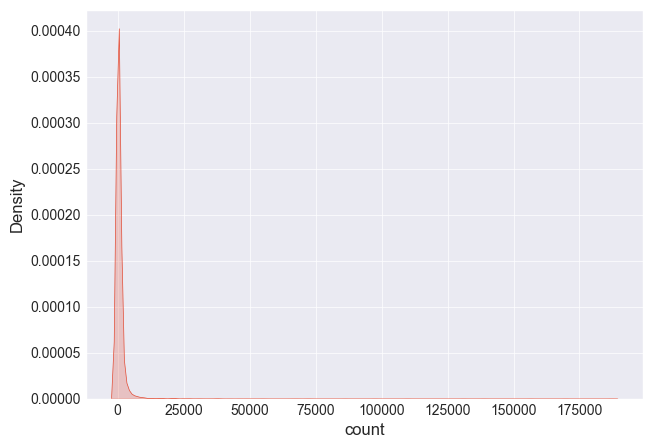

In [131]:
# distribution of number of accidents
sns.kdeplot(
    number_of_accidents_by_city[number_of_accidents_by_city>10], fill=True,
)

In [117]:
high_accident_cites = number_of_accidents_by_city[number_of_accidents_by_city>=2000]
low_accident_cities = number_of_accidents_by_city[number_of_accidents_by_city<2000]

print(f"Number of High Accident Cities: {high_accident_cites.count():,}")
print(f"Number of Low Accident Cities: {low_accident_cities.count():,}")

Number of High Accident Cities: 649
Number of Low Accident Cities: 13,029


<Axes: xlabel='count', ylabel='Density'>

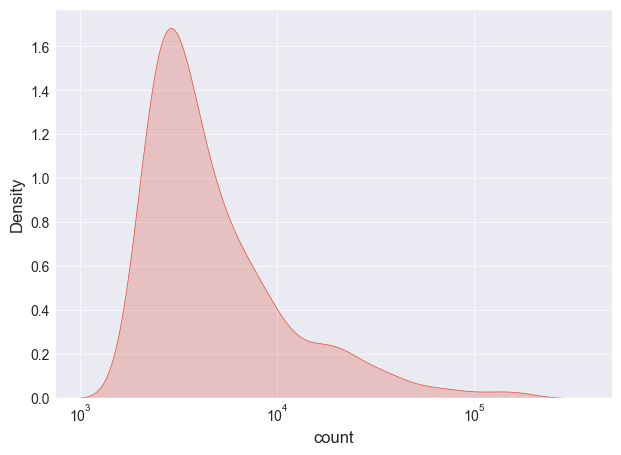

In [122]:
sns.kdeplot(high_accident_cites, fill=True, log_scale=True)

<Axes: xlabel='count', ylabel='Density'>

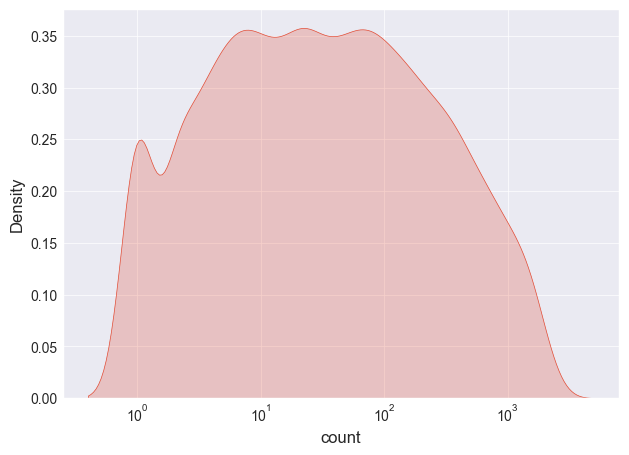

In [120]:
sns.kdeplot(low_accident_cities,fill=True,log_scale=True)